# Clube da Meta
Exploratory Data Analysis

**Authors:**
- Ígor Yamamoto

**Objectives:**
- Evaluate performance from clube da meta's participants
- Keep track of results collected from the group

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

# Data Loading

In [2]:
objectives = pd.read_csv('data/clube_da_meta.csv')
print(objectives.shape)
objectives.head()

(136, 7)


,week,person,objective,expected,actual,completion,debit
0,1,K,1,3,1,0.33,$10.00
1,1,F,1,2,2,1.00,$0.00
2,1,F,2,0,0,1.00,$0.00
3,1,B,1,2,2,1.00,$0.00
4,1,B,2,3,3,1.00,$0.00


# Data Processing

In [3]:
objectives.dtypes

week            int64
person         object
objective       int64
expected        int64
actual          int64
completion    float64
debit          object
dtype: object

In [4]:
objectives = objectives.dropna()

In [5]:
objectives.debit = objectives.debit.apply(lambda x: x.strip('$')).astype('float64')

### Completion rate weekly evolution by person

In [6]:
weekly_completion = (
    objectives[['week', 'person', 'completion']]
    .groupby(['person', 'week'])
    .completion.mean()
)

Text(0, 0.5, 'Completion')

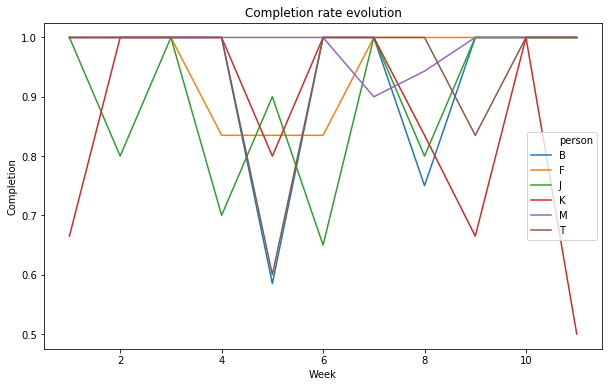

In [7]:
plt.figure(figsize=(10,6))
plt.title("Completion rate evolution")

weekly_completion_data = pd.DataFrame(data={'completion': weekly_completion.values}, index=weekly_completion.index).reset_index()
sns.lineplot(data=weekly_completion_data, hue='person', x='week', y='completion')

plt.xlabel("Week")
plt.ylabel("Completion")

### Cumulative sum of debit by person

In [8]:
cumulative_debit = (
    objectives[['week', 'person', 'debit']]
    .groupby(['person', 'week'])
    .debit.sum()
    .groupby('person')
    .cumsum()
)

Text(0, 0.5, 'Accumulated Debit')

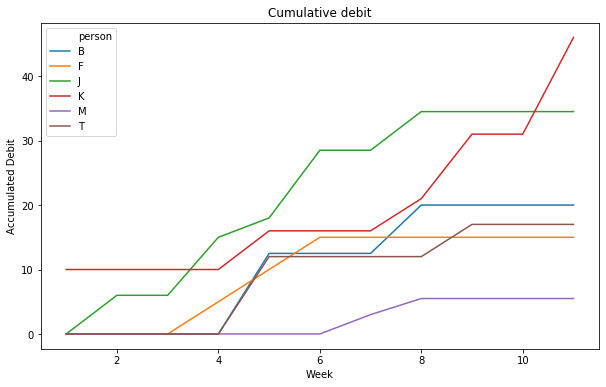

In [9]:
plt.figure(figsize=(10,6))
plt.title("Cumulative debit")

cumulative_debit_data = pd.DataFrame(data={'acc_debit': cumulative_debit.values}, index=cumulative_debit.index).reset_index()
sns.lineplot(data=cumulative_debit_data, hue='person', x='week', y='acc_debit')

plt.xlabel("Week")
plt.ylabel("Accumulated Debit")